# Analyzing movie reviews

Notebook by [Wenyi Xu](https://github.com/xuwenyihust)

<br/>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

In [3]:
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
fandango_score_comparison.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Histograms Comparison

The Fandango ratings are much more centered, the min score is 3.0. While the distribution of Metacritic's rating is more flat.

<br/>

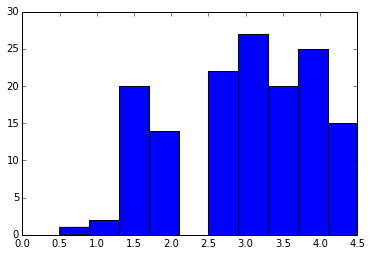

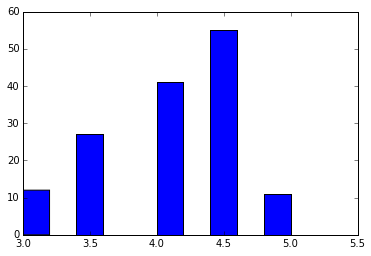

In [4]:
plt.hist(fandango_score_comparison["Metacritic_norm_round"])
plt.show()
plt.hist(fandango_score_comparison["Fandango_Stars"])
plt.show()

## Metrics Comparison

<br>

In [5]:
Metacritic_mean = fandango_score_comparison["Metacritic_norm_round"].mean()
Fandango_mean = fandango_score_comparison["Fandango_Stars"].mean()
print("Metacritic_mean: ", Metacritic_mean)
print("Fandango_mean: ", Fandango_mean)

Metacritic_mean:  2.97260273973
Fandango_mean:  4.08904109589


In [6]:
Metacritic_median = fandango_score_comparison["Metacritic_norm_round"].median()
Fandango_median = fandango_score_comparison["Fandango_Stars"].median()
print("Metacritic_median: ", Metacritic_median)
print("Fandango_median: ", Fandango_median)

Metacritic_median:  3.0
Fandango_median:  4.0


In [7]:
Metacritic_std = np.std(fandango_score_comparison["Metacritic_norm_round"])
Fandango_std = np.std(fandango_score_comparison["Fandango_Stars"])
print("Metacritic_std: ", Metacritic_std)
print("Fandango_std: ", Fandango_std)

Metacritic_std:  0.987561029704
Fandango_std:  0.53853216127


## Differences

The reason why "the median for Metacritic_norm_round be lower than the mean, but the median for Fandango_Stars is higher than the mean" may be that the mean rating can be pulled down a lot by a few really low ratings.

<br/>

## Find the largest outlier

Find the movies that contribute the most to the differences between **Metacritic_norm_round** and **Fandango_Stars**.

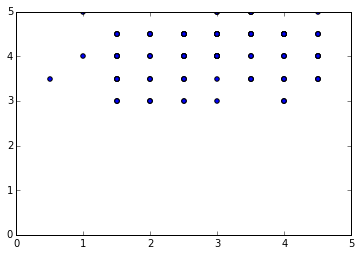

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set(xlim=(0,5), ylim=(0,5))
plt.scatter(fandango_score_comparison["Metacritic_norm_round"], fandango_score_comparison["Fandango_Stars"])
plt.show()

In [9]:
fandango_score_comparison["fm_diff"] = np.abs(fandango_score_comparison["Metacritic_norm_round"] - fandango_score_comparison["Fandango_Stars"])
fandango_score_comparison = fandango_score_comparison.sort("fm_diff", ascending=False)
fandango_score_comparison.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3


## Correlation

<br/>

In [10]:
slope, intercept, r_value, p_value, stderr_slope = linregress(fandango_score_comparison["Metacritic_norm_round"], fandango_score_comparison["Fandango_Stars"])

In [11]:
# Predict what a movie that got a 3.0 in Metacritic would get on Fandango using the line.
y = 3 * slope + intercept
print(y)

4.09170715282


## Residual Plot

<br/>

In [12]:
x = (4.0 - intercept)/slope
print(x)

2.05758774098


In [13]:
def predict(x):
    return x * slope + intercept

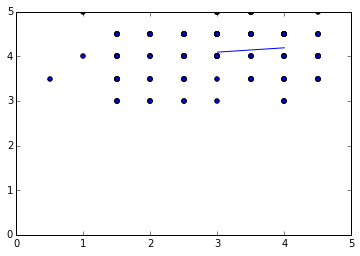

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set(xlim=(0,5), ylim=(0,5))
plt.scatter(fandango_score_comparison["Metacritic_norm_round"], fandango_score_comparison["Fandango_Stars"])

x = [3.0, 4.0]
y = [predict(i) for i in x]
plt.plot(x,y)

plt.show()